In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D

Using TensorFlow backend.


In [2]:
from keras.datasets import mnist

In [3]:
def load_data(path):
    with np.load(path) as f:
        x_train, y_train = f['x_train'], f['y_train']
        x_test, y_test = f['x_test'], f['y_test']
        return (x_train, y_train), (x_test, y_test)

(x_train, y_train), (x_test, y_test) = load_data('data/mnist.npz')

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_test.shape

(10000, 28, 28)

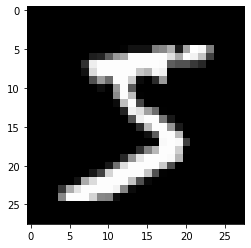

In [6]:
plt.imshow(x_train[0],cmap='gray')

In [7]:
#scaling values to between 0 and 1
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train/=255.0
x_test/=255.0

In [8]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [9]:
#change prediction class into categorical
from keras.utils.np_utils import to_categorical

y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# CNN MODEL

## Understanding filter

In [10]:
#making a image tensor using training samples
img_tensor = x_train.reshape(60000,28,28,1)

In [11]:
#creating a model with one node of shape(3,3), strides = (1,1) and no padding
model = Sequential()
model.add(Conv2D(1,(3,3),strides = (1,1),input_shape=(28,28,1)))
model.compile('adam','mse')

In [12]:
#taking a sample image and converting it into a tensor
sample_image = x_test[0].reshape(1,28,28,1)

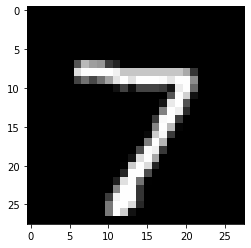

In [13]:
plt.imshow(sample_image[0,:,:,0],cmap='gray')

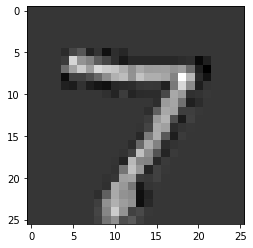

In [14]:
#predicting the image (Note that the model is not trained)
img_pred = model.predict(sample_image)
plt.imshow(img_pred[0,:,:,0],cmap='gray')

# Looking at the Filter

In [15]:
wt = model.get_weights()
print(wt)

[array([[[[ 0.01491559]],

        [[ 0.18525821]],

        [[-0.37529743]]],


       [[[ 0.0513379 ]],

        [[ 0.18157685]],

        [[ 0.4930172 ]]],


       [[[-0.48211473]],

        [[ 0.5589385 ]],

        [[-0.1528945 ]]]], dtype=float32), array([0.], dtype=float32)]


In [16]:
wt[0].shape

(3, 3, 1, 1)

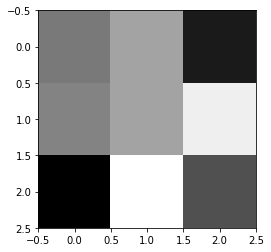

In [17]:
plt.imshow(wt[0][:,:,0,0],cmap='gray')

 # Create our own filter

In [18]:
wt[0] = np.ones(wt[0].shape)
model.set_weights(wt)

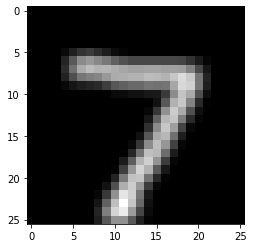

In [19]:
img_pred = model.predict(sample_image)
plt.imshow(img_pred[0,:,:,0],cmap='gray')

# Final model

In [20]:
x_test = x_test.reshape(-1,28,28,1)

In [21]:
x_train = x_train.reshape(-1,28,28,1)

In [22]:
from keras.layers import Flatten, Activation, MaxPool2D,Dense

In [23]:
md = Sequential()

md.add(Conv2D(32,(3,3),input_shape = (28,28,1)))
md.add(MaxPool2D(pool_size=(2,2)))
md.add(Activation('relu'))
md.add(Flatten())
md.add(Dense(128,activation = 'relu'))
md.add(Dense(10,activation = 'softmax'))
md.compile(loss = 'categorical_crossentropy',
          optimizer = 'rmsprop',
          metrics=['accuracy'])

In [24]:
md.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
activation_1 (Activation)    (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               692352    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


In [ ]:
md.fit(x_train,y_train_cat,batch_size=128,epochs=2,verbose=1,validation_split=.2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 48000 samples, validate on 12000 samples
Epoch 1/2
39936/48000 [=======================>......] - ETA: 0s - loss: 0.2710 - acc: 0.9185

In [ ]:
result = md.evaluate(x_test,y_test_cat)

In [ ]:
result